# Practical 3: Convolutional Neural Networks (CNNs)
https://courses.cs.ox.ac.uk/pluginfile.php/14000/course/section/1444/practical3.pdf

In [ ]:
import torch
from torchvision import datasets, transforms

transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# get MNIST
dataset = datasets.MNIST('./mnist', train=True, download=True, transform=transform)
dataset_train, dataset_valid = torch.utils.data.random_split(dataset, [50000, 10000])
dataset_test = datasets.MNIST('./mnist', train=False, transform=transform)

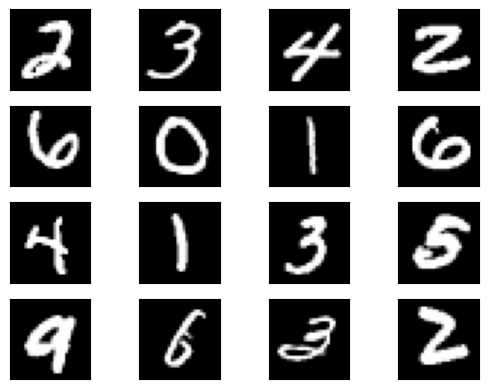

In [5]:
# visualize some images
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(dataset_train[i][0].reshape(28, 28), cmap='Greys_r')

In [ ]:
# make the model
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.module):
    def __init__(self):
        super().__init__()

        # shape Bx1x28x28
        # guide on page 15: https://arxiv.org/pdf/1603.07285
        self.conv1 = nn.Conv2d(
            in_channels=1, 
            out_channels=25,
            kernel_size=12, 
            stride=2,
            padding="valid"
        )
        
        # Bx25x9x9
        self.conv2 = nn.Conv2d(
            in_channels=25, 
            out_channels=64,
            kernel_size=5, 
            stride=1,
            padding="same"
        )

        # Bx64x9x9
        self.pool = nn.MaxPool2d(2, 2)

        # Bx64x4x4
        self.flat1 = nn.Linear(1024, 1024)
        self.dropout = nn.Dropout(p=0.2)
        self.flat2 = nn.Linear(1024, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.flat1(x))
        x = self.dropout(x)
        x = F.relu(self.flat2(x))
        return x
